## 🔴 **Cite This Notebook** 🔴

If you find this notebook useful in your research or projects, please consider citing it. Proper citation helps me gain recognition for my work and allows others to follow and build upon it.

**Sondos, _An End-to-end segmentation-free approach Iris Biometric Authentication_, Open Source (GitHub & Kaggle), May 2024. Available at: [https://github.com/sondosaabed/Iris-of-eyes-recognition](https://github.com/sondosaabed/Iris-of-eyes-recognition) and [https://www.kaggle.com/code/sondosaabed/iris-eye-recognition-endtoend-93](https://www.kaggle.com/code/sondosaabed/iris-eye-recognition-endtoend-93)**
<hr>

## <div align="center"> Iris eye Recognition</div>
<div align="center">
An (End-to-end segmentation-free approach) Iris Biometric Authentication 
</div>
<hr>

## **Abstract**

In this project, a Biometric Authentication system using the Iris biometric authentication method is designed. The approach taken is using the CASIA-Thousand-IRIS dataset and model it using the Deep Convultional Neural Network Architicture, with the minimum image-preprocessing such as resizing with keeping the aspect ratiio and normalization. It is an end-to-end technique without performing segmentaion of the IRIS itself. The results are promising, even without perfroing training on augmentation, the testing accuracy has reached **(93.15%)**. Finally, for the proof of the (biometric authentication system concept) a simple mobile application is designed and the model is deployed on it (IrisRecognizer) as it was exported to it's liter version were default quantization is performed. 
<hr>

## Table of Contents
- Introduction
    - Aim and Objectives
    - Methodology
- Theory
    - About Dataset Used
    - Deep Learning for Image Recognition
- Software Listing
- Implementation
    - Dataset Analysis
        - Loading dataset
        - Exploring dataset (vidualization, distributions)
        - Preparing dataset (images, labels, spliting)
        - experimnt with Augemntaion
    - Data Modeling (The verifier)
        - Model Architicture
        - Traing and Testing
        - Model Performance (Loss and accuracy)
        - Testing and saving weights
        - Evaluation Metrics
        - Model Exporting
    - GUI (The authenticator)
        - First time users, and prefrences
        - Image accqusition
        - Image preparing for recognition
        - Model Inference
- Discussion and optimization
- Conclusion
- Refrences

## List of Figures
- Figure 1: IRis dataset collection device IKEMB-100 camera 
- Figure 2: Figure: Data Sample from IRIS CaSIA
- Figure 3: Ramndom Small sample of the dataset
- Figure 4: Image 50 person label ..
- Figure 5: Distribution of Image Sizes
- Figure 6: Distribution of Aspect Ratios
- Figure 7: Labels Frequency Treemap
- Figure 8: Preprocessed image sample
- Figure 9: Augmented image sample
- Figure 10: Model accurac
- Figure 11: Loss Learning Curve
- Figure 12: Prefrences
- Figure 13: Image acusition
- Figure 14: Model Answer

## List of Tables
- Table 1: Software Listenings
- Table 2: Dataset Head
- Table 3: Dataset Tail
- Table 4: Dataset Numerical Describtion
- Table 5: Missing Values By Percentage
- Table 6: Dataset Columns Data types
- Table 7: Number of uniques in the datasets
- Table 8: Labels Distribution

<hr>

## **Introduction**

The science of Cybersecurity has become essential and irreparable in modern life. With the rise of information technology, the fragility and vulnerability also increases. One of the aspects that cybersecurity addresses is the sophisticated kinds of cybercrime and cyberespionage activities, as well as cyber-terror and cyberwar. Another aspect that cybersecurity addresses is Controlling Access for computer resources, with a known framework called: the triple A’s (AAA) [1] it stands for Authentication, Authorization, and Accounting. This report is concerned with the first A: the Authentication part. Simply put, Authentication is when the user provides information to the system that affirm they are who they claim to be. There are three main types of authentication:
- Something you know, like a password.
- Something you have, like a Universal Serial Bus (USB) key.
- Something you are, such as fingerprint or other biometrics.

![image](https://github.com/sondosaabed/Iris-of-eyes-recognition/assets/65151701/1d752641-d441-4c6d-8c4d-52f0dfa92c38)

**Fig. 1:** Access control: Perceived level of applied security


Something you are or Biometric-based authentication has gained attention in authentication due to what it brought to the table as against somethings you know and somethings you have. It overcame and introduced negative and positive recognition. However, biometric-based raises privacy concerns in terms of collection. That introduces to the organisations who use the biometric-based data protection tasks. In this report, the focus is on Iris biometric authentication. The Iris-Recognition has been widely used in identification for these reasons:

1. `Unique:` there are not any iris having the same physical characteristic as others, even if they come from the same person or identical twins; 
2. `Stability:` the iris is formed during childhood, and it generally maintains unchangeable physical characteristics throughout life; 
3. `Informative:` the iris has rich texture information such as spots, stripes, 
laments and coronas.
4. `Safety:` Since the iris is located in a circular area under the surface of the eye between the black pupil and the white sclera, it is rarely disturbed by external factors. As a result, it is dicult to forge the iris pattern; 
5. `Contactless:` Iris Recognition (IR) is more hygienic than biometrics that requires contact, such as fngerprint recognition.

## Background
The anatomy of the human eye has inspired computer vision tasks from the beginning. As shown in the following figure, the Iris is located between the white sclera and the cornea. That is a contactless area from the human face. It is worth mentioning that left and right iris have distinctive patterns too for the same person.

![image](https://github.com/sondosaabed/Iris-of-eyes-recognition/assets/65151701/27f38752-b6cc-42ea-84d6-707e4804f379)

**Fig. 2:** Human-Eye Anatomy

### Iris Recognition Technology 
Iris Recognition technology is the use of automated methods of biometric identification that depends on mathematical induction of rules that define such complex patterns. The idea is to minimise the the intra which is the patterns (within) that helps identify the person, while also maximise the inter which is the patterns (between) that differs that person from the other one. The process starts by acquisition stage, it could be done using different devices such as the one shown in the following which is a secure Kit used portable for enrollment and recognition:

![image](https://github.com/sondosaabed/Iris-of-eyes-recognition/assets/65151701/f63fc668-05d1-4a6d-9d2c-34fd91fdf19b)
**Fig. 3:** Iris scanner PIER 2.3 (Portable Iris Enrollment and Recognition) from SecuriMetrics

Once the individual Iris is acquired using these devices, the features then are extracted. It could be implicitly or explicitly extracted to create a unique template matrix. The template will then be matched and compared against the other templates. The Authorization is granted or denied based on the Authentication of the Iris results. 

Two Iris templates from the same eye will be forming a genuine pair. While two different eyes will form an imposter pair. The matching comparison between the templates includes correlation ana;ysis, both the genuine pairs and the imposter are correlated, but the correlation from the same eye are stronger.


## Problem Statemnt

About the Problem Statemnet of this project: This is a classification problem where we have mutli persons each have left eye or right eyes Iris. Mainly teh dataset contains 1000 persons with Iris images of the Left and the Right eye. In total there is 2000 unique labels.

## Approach
As for the approach in this implenetauion, is an  End-to-end segmentaion free approach using deep learning for identifiation of Iris. Where a base model is used as the Feature extractor and the Dense softmax are used for the classification task.

### Aim and Objectives

- To design a biometric based authentication system.
- To perform data analysis on Iris Dataset
- To perfrom data modeling as a user recognition task (Verifier Module) 
- To build an enrollment module (Enrollment Module)

<hr>

## **Theory**

### About Dataset used

CASIA-Iris-Thousand contains 20,000 iris images from 1,000 subjects, which were collected using IKEMB-100 camera (Figure ) produced by IrisKing. IKEMB-100 is a dual-eye iris camera with friendly visual feedback, realizing the effect of “What You See Is What You Get”. The bounding boxes shown in the frontal LCD help users adjust their pose for high-quality iris image acquisition. The main sources of intra-class variations in CASIA-Iris-Thousand are eyeglasses and specular reflections. Since CASIA-Iris-Thousand is the first publicly available iris dataset with one thousand subjects, it is well-suited for studying the uniqueness of iris features and develop novel iris classification and indexing methods.

<div align="center">
    <p>Figure: IRis dataset collection device IKEMB-100 camera [3]</p>
    <img src="https://hycasia.github.io/dataset/casia-irisv4/V4Fig.8.jpg" alt="Iris collection device"/>
    <p>Figure: Data Sample from IRIS CaSIA [3]</p>
    <img src="https://hycasia.github.io/dataset/casia-irisv4/V4Fig.9.jpg" alt="Data sample"/>
</div>

### Deep Learning for Image recognition

Deep learning is widly used in such feilds of authentication. CNN specifically has revolutionalized the feilds of image recognition. An Iris recognition framework based on CNN features is widly used alongside image preprocessing.

There are diffrent architicutres used in litrature research, however this architicure uses the minimum preprocessing techniques. 

There are also diffrent dataset that are there, the reason that CASIA was used is the the data is balanced
<hr>

## **Software Listing**

In this project many tools were used and utilized. The followning table shows the software tools and versions used in this project.

Table 1: Software Listenings

| Tools   | Version   |
|-------|-----------|
|Python|3.12.2|
| pandas | 2.2.2 |
| numpy    | 1.26.4 |
| Pillow (PIL) | 9.5.0 |
| TensorFlow | 2.15.0 |
| OpenCV (cv2) | 4.9.0 |
| Keras (TensorFlow) | updated |
| matplotlib   | updated |
| scikit-learn | updated |
| squarify | updated |
|Visual Studio Code| Updated|
|Git & github| https://github.com/sondosaabed/Iris-of-eyes-recognition|
|Android Studio|https://github.com/sondosaabed/IrisRecognizer|
|torch|Updated|
|torchmetric|Updated|
<hr>

## **Implemetation**

In this section, the aim and objectives are met and presented. First the dataset is looked into and decisions are made based on that, then the model archeiticure is prepared and finally the enrollment module is used and the model is integrated into it.

Necceary imports

In [1]:
## Visualization, sampling and data loading
import squarify 
import os
import PIL
import math
import cv2
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Data modeling
import tensorflow as tf
from keras import Sequential
from sklearn.model_selection import cross_val_score
from keras import backend as K
from tensorflow import keras as keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score,  roc_curve, confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.layers import Layer, Input, Dense,Dropout, Conv2D, BatchNormalization, Flatten, Input, Conv2D, GaussianNoise,MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Input

### Model evaluatoin
from torchmetrics import Precision, Recall, Accuracy, AUROC
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.optimize import brentq
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.metrics')

import numpy as np
from scipy.optimize import brentq
from scipy.interpolate import interp1d

2025-05-02 21:04:03.076683: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-02 21:04:03.165349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746209043.194856   18874 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746209043.207394   18874 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746209043.270514   18874 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


### **Dataset Analysis**
This is the first part of the impelemntaion, it contains the whole data analysis process. Starting with reading the data, exploring the data, preprocessing the data (including images and lables) then finally preparing it for traing (including spliting into train and test). Will also experiment with data augmentaion.

#### Loading Dataset
In this section the dataset files and laels are loaded into a pandas dataframe.

In [3]:
def load_dataset(path):
    """
    Loading the dataset into a pandas datframe.
    The images of CASIA-Iris-Thousand are stored as:    /CASIA-Iris-Thousand/YYY/E/S5YYYENN.jpg

        YYY: the unique identifier of the subject in the subset
        E: ‘L’ denotes left eye and ‘R’ denotes right eye
        NN: the index of the image in the class
    
    Args:
        path(str): string that has the path of the dataset
    Returns:
        df(pd.DataFrame): the loaded dataframe
    """
    labels = []
    images = []

    for folder in os.listdir(path):
        for lr in os.listdir(path+'/'+folder): #left or right
            for image in os.listdir(path+'/'+folder+'/'+lr):
                if image.endswith('b') is False:
                    images.append(path+'/'+folder+'/'+lr+'/'+image)
                    labels.append(folder+'-'+lr) #+'-'+lr

    df = pd.DataFrame(list(zip(labels, images)), columns=['Label', 'ImagePath'])
    return df, labels, images

In [4]:
df, labels, images = load_dataset('/media/ammar/Partion1/Hazem Project/archive/CASIA-Iris-Thousand/CASIA-Iris-Thousand')

#### Expolring Dataset
This section includes looking into the visulaization, distributions, checking for missing and duplicates values. 

In [5]:
def missing_values(df):
    """
    This is to get the percetages of missing data
    Args:
        df (pd.Dataframe): contains the data
    Returns:
        missing_percetanges(pd.Dataframe): contains Column,	Counts, and	Percentage
            of the missing values for eah colmn
    """
    missing_count = df.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': (missing_count.values / len(df)) * 100  
    })
    return  missing_percetanges

In [6]:
def explore_data(df):
    """
    Exploring a dataset sample
    Args:
        sample (pd.Dataframe): the dataset sample to explore.
    Returns:
        results (dict): containing results of each exploration with the title as key
    """
    head = pd.DataFrame(df.head())
    tail = pd.DataFrame(df.tail())
    nunique = pd.DataFrame(df.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(df.describe())
    dtypes =  pd.DataFrame(df.dtypes, columns=["Datatype"])
    labels_distribution = pd.DataFrame(df['Label'].value_counts())
    results = {
        'Table 2: Dataset Head:':head,
        'Table 3: Dataset Tail:':tail,
        'Table 4: Dataset Numerical Describtion: ':describe,
        'Table 5: Missing Values By Percentage': missing_values(df), 
        'Table 6: Dataset Columns Data types: ':dtypes,
        'Table 7: Number of uniques in the datasets:':nunique,
        'Table 8: Labels Distribution:':labels_distribution}
    return results

In [7]:
def print_dataset_exploration(results):
    """
    Prints a beautufil display of each of the exploration dataframe
    Args:
        results (dict): contains exploration outputs with the title as key
    Returns:
        nothing
    """
    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Table 6: Missing Values By Percentage':
            print("Total Sum of Missing Percetange: ", dataframe['Percentage'].sum())
        display(dataframe)

In [8]:
print_dataset_exploration(explore_data(df))

Table 2: Dataset Head:


Label                                          ImagePath
0  622-R  /media/ammar/Partion1/Hazem Project/archive/CA...
1  622-R  /media/ammar/Partion1/Hazem Project/archive/CA...
2  622-R  /media/ammar/Partion1/Hazem Project/archive/CA...
3  622-R  /media/ammar/Partion1/Hazem Project/archive/CA...
4  622-R  /media/ammar/Partion1/Hazem Project/archive/CA...

Table 3: Dataset Tail:


Label                                          ImagePath
19995  125-L  /media/ammar/Partion1/Hazem Project/archive/CA...
19996  125-L  /media/ammar/Partion1/Hazem Project/archive/CA...
19997  125-L  /media/ammar/Partion1/Hazem Project/archive/CA...
19998  125-L  /media/ammar/Partion1/Hazem Project/archive/CA...
19999  125-L  /media/ammar/Partion1/Hazem Project/archive/CA...

Table 4: Dataset Numerical Describtion: 


Label                                          ImagePath
count   20000                                              20000
unique   2000                                              20000
top     956-L  /media/ammar/Partion1/Hazem Project/archive/CA...
freq       10                                                  1

Table 5: Missing Values By Percentage


Column  Counts  Percentage
0      Label       0         0.0
1  ImagePath       0         0.0

Table 6: Dataset Columns Data types: 


Datatype
Label       object
ImagePath   object

Table 7: Number of uniques in the datasets:


#_of_Unique
Label             2000
ImagePath        20000

Table 8: Labels Distribution:


count
Label       
956-L     10
956-R     10
967-L     10
967-R     10
827-L     10
...      ...
727-R     10
602-L     10
602-R     10
622-L     10
622-R     10

[2000 rows x 1 columns]

> In this initial data exploration, it is found out that the dataset has two cloumns. The first one contains the label of the Iris image: that label is in the form of (Subject XXX-Y) and the Y could be either left eye or right eye of the same subject. 

> The datset was checked for missing values and duplicates. There was no such found. We have 2000 unique labels and 20000 images. The fisrt look into the distribution seems fair, since there is 10 images for that same label.

##### Data Visualization 

now let's take a deeper look into the datset:

- Images Visualizations

In [9]:
def show_random_samples(df, num):
    """
    Shows a sample on the dataframe in a specific location.
    Args:
        df (pd.DataFrame): the dataset
        num (int): the number of random samples to display
    Return:
        Nothing but shows a sample in the display
    """
    random.seed(1190652)
    random_indices = random.sample(range(df.shape[0]), num)
    num_rows = math.ceil(num / 4) 

    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))  
    for i, idx in enumerate(random_indices):
        row = i // 4
        col = i % 4
        
        if idx < df.shape[0]:  
            image_path =  df.loc[idx, "ImagePath"]
            image = PIL.Image.open(image_path)
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"Image {idx} Person Label: {df.loc[idx, 'Label']}")
            ax.axis("off")

    plt.suptitle("Figure 3: Random Small Sample of the Dataset")
    plt.tight_layout()
    plt.show()

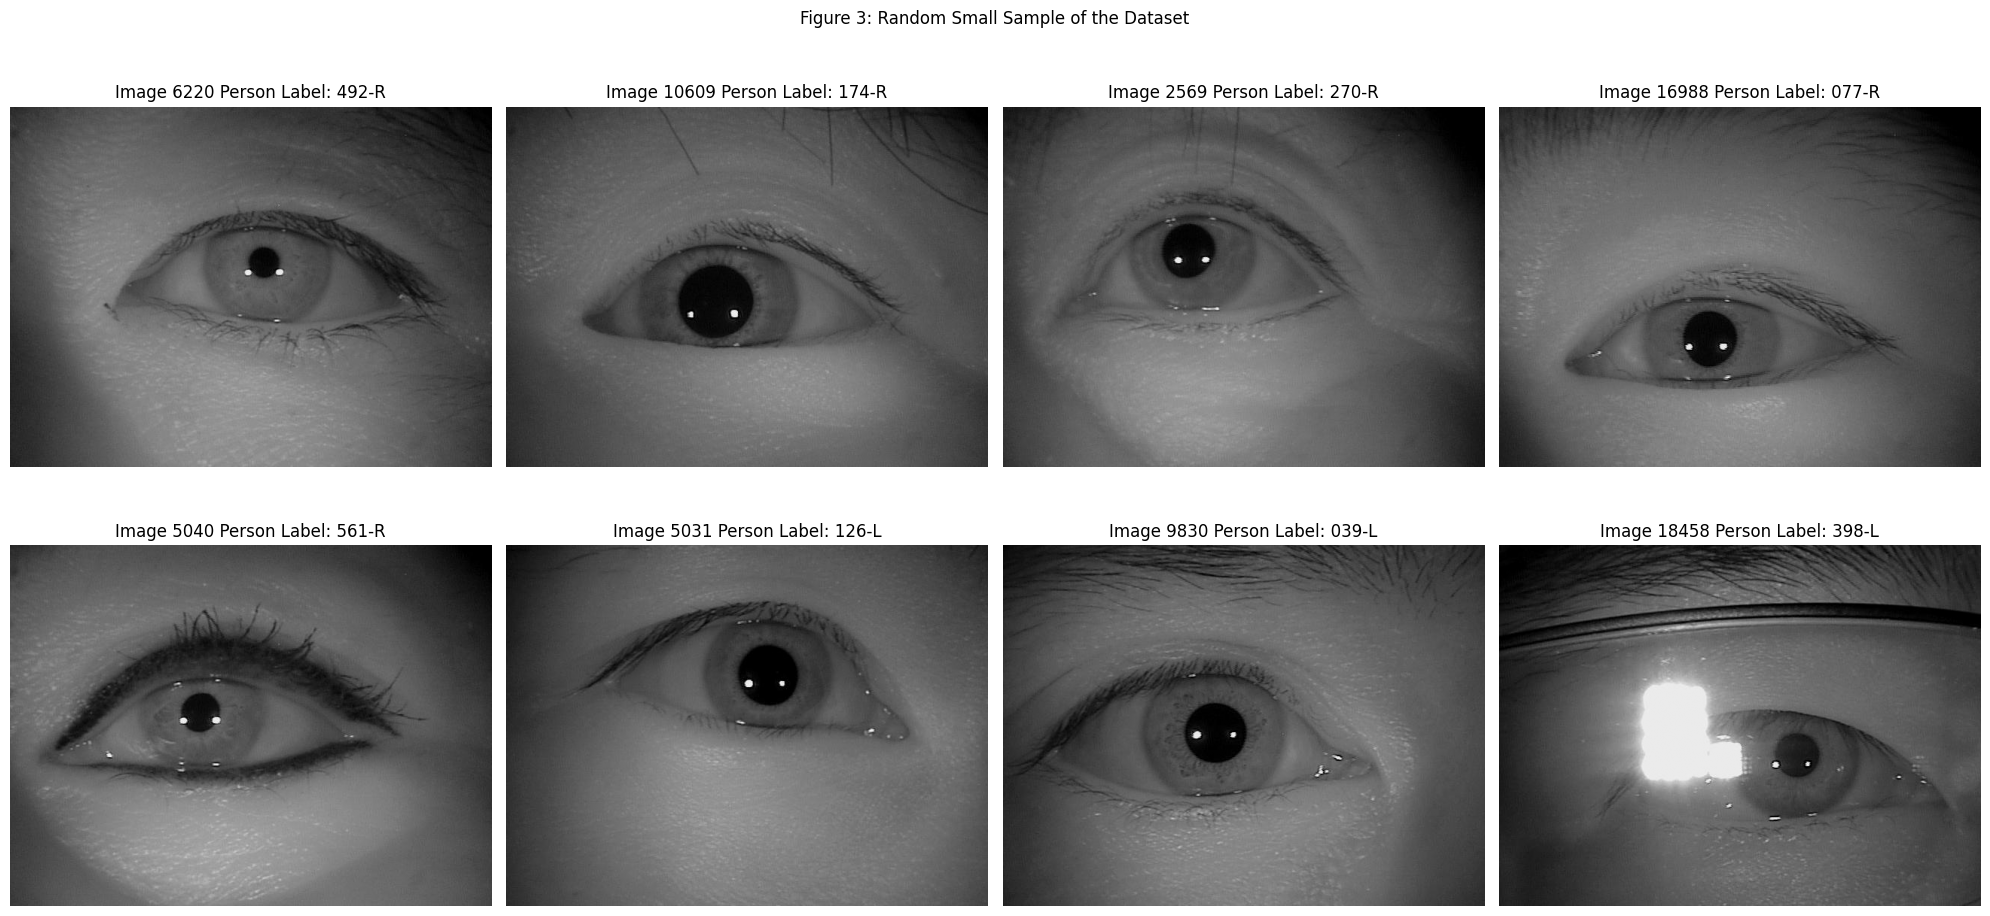

In [10]:
show_random_samples(df, 8)

> It is noticed that this random image contains diffrent features of such subjects in which thta:
- Some eyes are left samples and some eyes are right samples.
- Some eyes have glasses.
- Some eyes uses eyeliner.
- Some eyes interval are big.
- Some eyes intervals are small.
- The images are greyscaled.

The width of the images:  640
The height of the images:  480
Shape (640, 480)


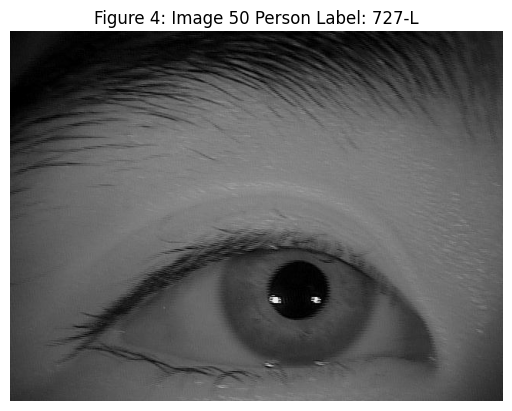

In [11]:
image_path =  df.loc[50, "ImagePath"]
image = PIL.Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Figure 4: Image {50} Person Label: {df.loc[50, 'Label']}")
plt.axis("off")
width, height = image.size
print("The width of the images: ", width)
print("The height of the images: ", height)
print("Shape", image.size)

##### Data Distrubutions
Let's take a look at the images sizes, aspect ratios and the labels distributions

- Calcutae sizes and aspect ratios:

In [12]:
image_sizes = []
aspect_ratios = []

for image_path in df['ImagePath']:
    image = PIL.Image.open(image_path)
    width, height = image.size
    image_sizes.append(width * height)
    aspect_ratios.append(width / height)

- Distribution of images sizes: The images sizes all are in standarized to the same size as the following figure shows that they are unformed:

Text(0, 0.5, 'Frequency')

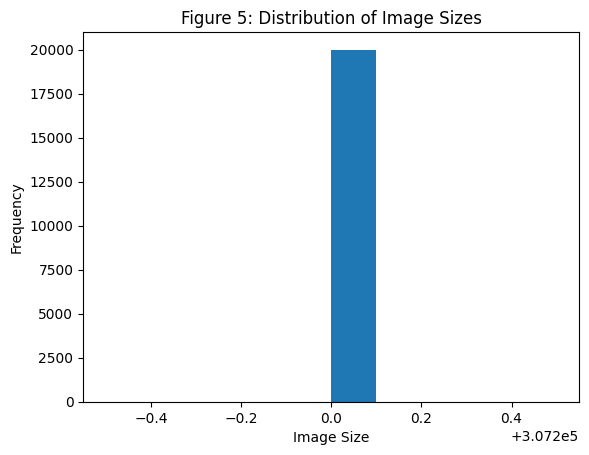

In [13]:
plt.hist(image_sizes, label="Image Size")
plt.title("Figure 5: Distribution of Image Sizes")
plt.xlabel("Image Size")
plt.ylabel("Frequency")

- Distribution of aspect ratios: let's just check teh aspect ratio if it's also the same. The follwing figure shows that they all have a unform aspect ratio which is 1.3:

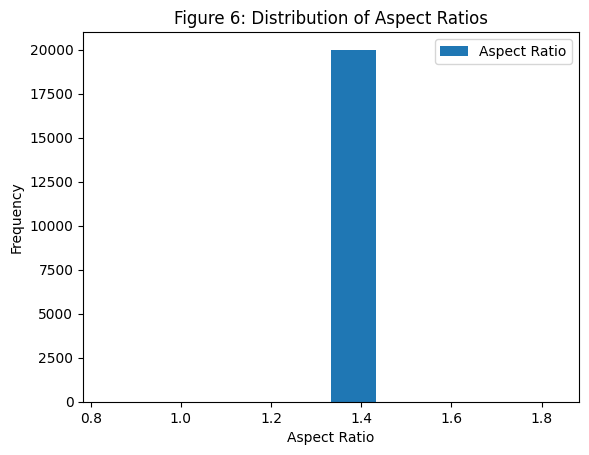

In [14]:
plt.hist(aspect_ratios, label="Aspect Ratio")
plt.title("Figure 6: Distribution of Aspect Ratios")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.legend()

- Labels distribution visualizations: the follwing frequency treemap is used to show the labels distribution. We have also unformed distribution, as each label has the same value counts (10).

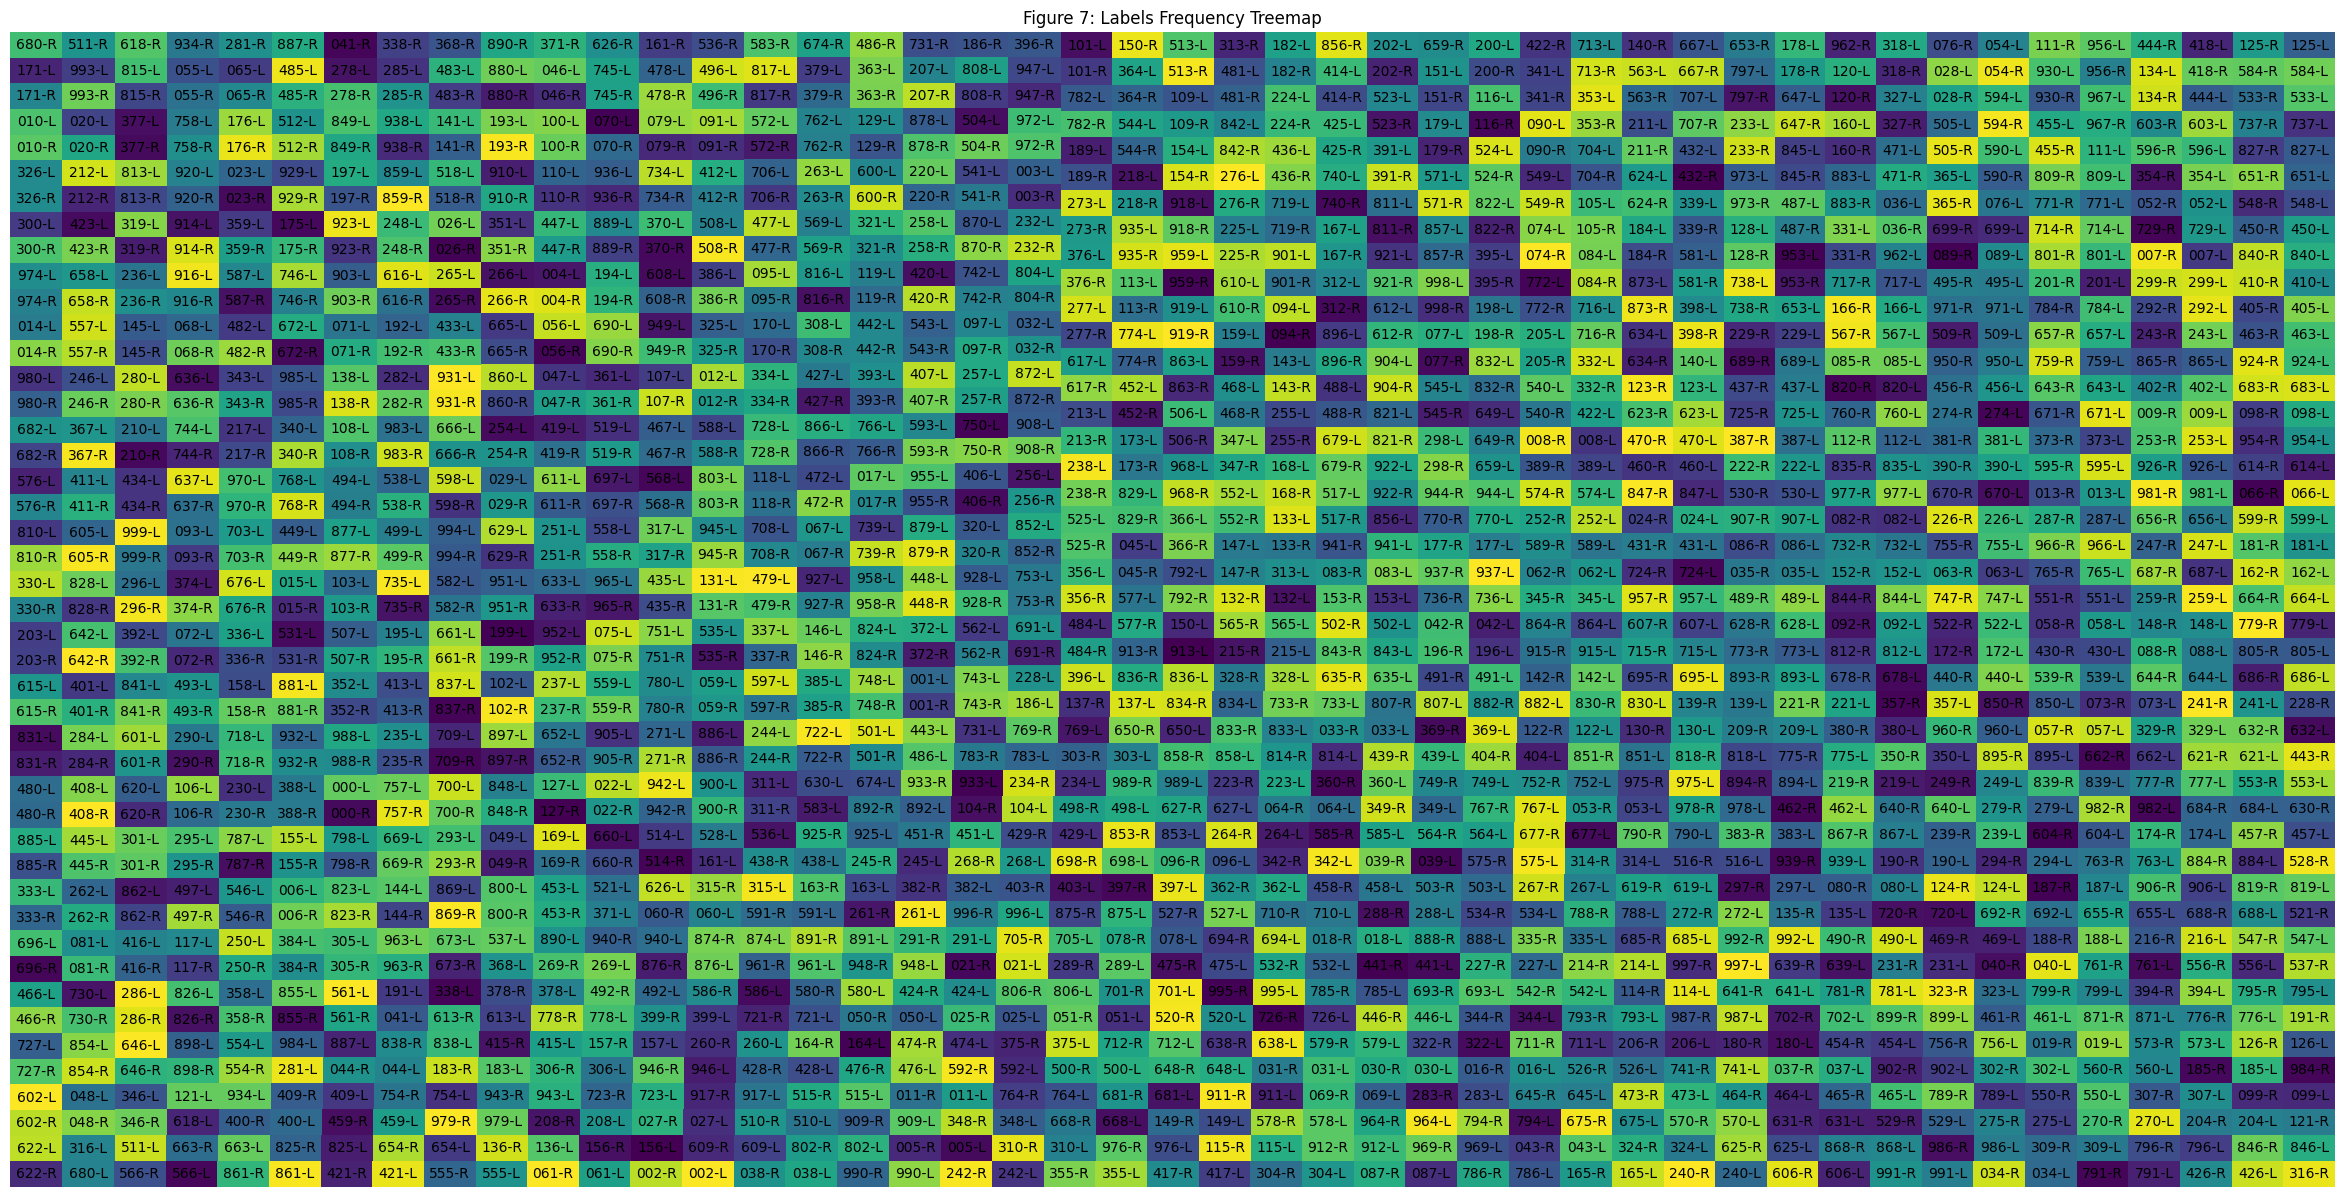

In [15]:
plt.figure(figsize=(30, 15))
squarify.plot(sizes=df['Label'].value_counts(), label=df['Label'].unique())
plt.axis('off')
plt.title('Figure 7: Labels Frequency Treemap')
plt.show()

> The dataset has balanced distributions, no missing or duplicated values are found. There will be minimum data prepartion decisions.

#### Preparing Dataset
Inludes sliting into train, test and validation, preprocessing the images to consitsnat size, encoding the labels.

##### Images preparing
- In the datset exploration, no missing images, and all the images have the same sizes and the same aspect ratios. However, due to processing resources limitations the decision is to resize all the images to a consistent size but smaller than that is now. The resizing algortihm is distortion free the sizes are changed but the aspect ratio is the same using pading values.

In [4]:
# Dataset Config
SIZE = 20000
NUM_CLASSES = 2000
IMG_HEIGHT = 150
IMG_WIDTH = 150
NUM_CHANNELS = 1
input_shape=(IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)

- Resizing is done with keeping the aspect ratio

In [ ]:
def resize_keep_aspect_ration(img, target_height=IMG_HEIGHT, target_width=IMG_WIDTH, pad_value=255):
    """
    Resize an image to a specific size keeping the aspect ratio using padding
    Args:
        - img (np.array): image
        - target_height (int): with the deafult value as IMG_HEIGHT
        - target_width (int): with the deafult value as IMG_WIDTH
        - pad_value (int): the padding value foe the left of the image with the deafult value is 255
    Returns:
        - The resized image
    """
    aspect_ratio = img.shape[1] / img.shape[0]
    
    ## Get the new sizes with keeping the aspect ratio
    if aspect_ratio > target_width / target_height:
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(target_height * aspect_ratio)

    resized_img = cv2.resize(img, (new_width, new_height))
    
    ## Padding up and down so the image is in the middle
    preprocessed_img = np.full((target_height, target_width), pad_value, dtype=np.uint8)
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2
    preprocessed_img[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_img
    
    return preprocessed_img

- The image preprocessing function will include:
    - Read with greyscale.
    - Resizing with keeping the aspcet ratio.
    - Normalization. [0, 1]

In [18]:
def preprocess_image(img_dir):
    """
    Resizing imgaes with keeping the aspect ratio.
    Args:
        img_dir(str): Image path on the dataset
        target_height(int): the targeted height to be resized
        target_width(int): the targeted width to be resized
        pad_value(int): used as the padding value for the resized image
    Returns:
        preprocessed_img (cv.Imgae): processsed image
    """
    img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    img = resize_keep_aspect_ration(img)
    img = img/255.
    
    return img

- This is an example of performing image resizing output:

<function matplotlib.pyplot.show(close=None, block=None)>

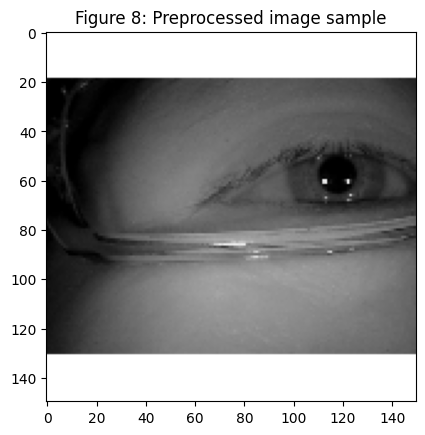

In [19]:
plt.imshow(preprocess_image(df.iloc[15]['ImagePath']), cmap="gray")
plt.title("Figure 8: Preprocessed image sample")
plt.show

##### labels preparing:
- For the labels preparing for training, not much is needed. There was no missing values, However the datatype of the labels will be strings instead of numerical. The label will be considered as a string (person name) and that will be encoded. The distribution of the labels was also looked into and it was found that the labesl are equally distribuation and no customized data augmentation is needed. 

In [20]:
def preprocess_labels(df):
    """
    Prepares labels for training indluding transform to string and then encode.
    Args: 
        df(pd.DataFrame): dataset non-encoded labels and images paths
    Rteurns:
        labels(np.array): prepared labels for training
    """
    labels = df['Label'].astype(str)
    le = LabelEncoder()
    le.fit(labels)
    labels = le.transform(labels)
    return labels

- Example of preprocessing the labels into encoded labels:

In [21]:
print("Label after encoding: ", preprocess_labels(df)[120])
print("Label before encoding: ",df.iloc[120]['Label'])

Label after encoding:  1771
Label before encoding:  885-R


- Split the dataset into trainig, testing and validation dataset. The splitting rule is 70:15:15

In [22]:
def split_dataset(preprocessed_images, preprocessed_labels, train_size=0.8, validation_size=0.1, shuffle=True):
    """
    Returns the splitted dataset using the 80:10:10 split rule (for deep learnig we do train split) Pareto principle
    Args:
        preprocessed_images()
        preprocessed_labels
    Returns:
        x_train(np.Array): training images
        x_valid(np.Array): validation images
        x_test(np.Array): testing images
        y_train(np.Array): training labels
        y_valid(np.Array): validation labels
        y_test(np.Array): testing labeles
    """
    np.random.seed(1190652)
    indices = np.arange(SIZE)
    if shuffle:
        np.random.shuffle(indices)
    
    train_samples = int(SIZE * train_size)
    validation_samples = int(SIZE * validation_size)
    
    train_indices = indices[:train_samples]
    validation_indices = indices[train_samples:train_samples + validation_samples]
    test_indices = indices[train_samples + validation_samples:]
    
    x_train  = preprocessed_images[train_indices]
    y_train = preprocessed_labels[train_indices]
    x_valid = preprocessed_images[validation_indices]
    y_valid = preprocessed_labels[validation_indices]
    x_test = preprocessed_images[test_indices]
    y_test = preprocessed_labels[test_indices]
    
    return x_train, x_valid, x_test, y_train, y_valid, y_test

- Dataset preparation for the training

In [23]:
def prepare_dataset(df):
    """
    Prepares the dataset to training and modeling
    Args:
        df(pd.DataFrame): the dataset
    Returns:
        x_train(np.Array): training images
        x_valid(np.Array): validation images
        x_test(np.Array): testing images
        y_train(np.Array): training labels
        y_valid(np.Array): validation labels
        y_test(np.Array): testing labeles
    """
    preprocessed_images = []
    for i in range(SIZE):
        image = preprocess_image(images[i])
        preprocessed_images.append(image)
    
    preprocessed_images = np.array(preprocessed_images).reshape(-1, IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)
    preprocessed_labels = preprocess_labels(df)
    return split_dataset(preprocessed_images, preprocessed_labels)

In [ ]:
x_train, x_valid, x_test, y_train, y_valid, y_test = prepare_dataset(df)
print("Triaing set size: ", x_train.shape)
print("Validation set size: ", x_valid.shape)
print("Testing set size: ",x_test.shape)

#### Data Augmentaion
Here is one of the experimnet conduted, was training on augmneted images. Which for some reason faild to give better results. The thought is it might be due to the technique used itself or due to the task, it could need data synthesizing instead of data augmentaiion.

In [ ]:

# Define the custom CentralCrop class
class CentralCrop(Layer):
    def __init__(self, central_fraction=0.5):
        super(CentralCrop, self).__init__()
        self.central_fraction = central_fraction

    def call(self, inputs):
        # Apply central crop
        return tf.image.central_crop(inputs, central_fraction=self.central_fraction)

# Define the DataAugmentation class
class DataAugmentation(Layer):
    def __init__(self, input_shape, central_fraction=0.5, rotation_factor=0.2, zoom_height_factor=0.1, zoom_width_factor=0.1):
        super(DataAugmentation, self).__init__()
        self.central_fraction = central_fraction
        self.rotation_factor = rotation_factor
        self.zoom_height_factor = zoom_height_factor
        self.zoom_width_factor = zoom_width_factor

        # Define the augmentation pipeline
        self.augment = Sequential([
            CentralCrop(central_fraction=self.central_fraction),  # Apply central crop
            RandomFlip(mode='horizontal_and_vertical'),
            RandomRotation(factor=self.rotation_factor),
            RandomZoom(height_factor=self.zoom_height_factor, width_factor=self.zoom_width_factor)
        ])

    def call(self, inputs, training=None):
        if training:
            return self.augment(inputs)
        return inputs


In [ ]:
# Instantiate the DataAugmentation layer
data_augmentation_layer = DataAugmentation(input_shape=input_shape, central_fraction=0.8)

# Assuming 'x_train' is your input image tensor
augmented_images = data_augmentation_layer(x_train, training=True)  # Apply augmentations during training


2025-05-02 21:01:39.915512: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-02 21:01:39.915539: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-05-02 21:01:39.915546: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-05-02 21:01:39.915550: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-05-02 21:01:39.915554: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: ammar-Dell-G15-5520
2025-05-02 21:01:39.915557: I external/local_xla/xla/stream_executo

- Here is an example of the augmented dataset

Encoded Person Label is: 1629


<function matplotlib.pyplot.show(close=None, block=None)>

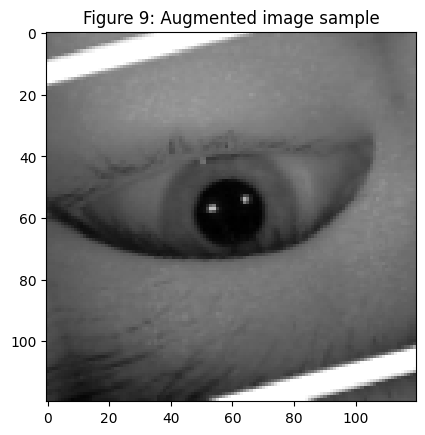

In [28]:
print(f'Encoded Person Label is: {y_valid[70]}')
plt.imshow(augmented_images[70], cmap="gray")
plt.title("Figure 9: Augmented image sample")
plt.show

<hr>

### **Data modeling (The Verifier)**

- Training Setup and configuration, callbacks: for better training setup three callbacks were used one that is used for early stopping based on the validation loss (minimization). One saves the model best weights called model checkpointing and finally the Reduce LR on Platea wich monitors the validation loss and changes to the goal of (minimzation) of it

In [3]:
EPOCHS = 200
BATCH_SIZE = 32
loss = 'sparse_categorical_crossentropy'
activation = "leaky_relu"
initial_learning_rate = 0.0010000000474974513
optimizer = Adam(learning_rate=initial_learning_rate)

# Callbacks — monitor val_accuracy instead of val_loss
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
mcp_save = ModelCheckpoint('.mdl_wts.keras', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='max')


2025-05-02 21:04:21.169649: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-02 21:04:21.169675: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-05-02 21:04:21.169682: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-05-02 21:04:21.169687: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-05-02 21:04:21.169691: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: ammar-Dell-G15-5520
2025-05-02 21:04:21.169700: I external/local_xla/xla/stream_executo

#### Model Archeticticure:

In [5]:
def create_model():
    """
    Create the model architicure and compile it, call on pre-set values.
    Returns:
        model (keras.Sequential): a model compiled with its layers
    """
    padding = 'same'
    poolpadding = 'valid'

    model = Sequential([
        Input(input_shape),
        ####### Features extraction
        
        Conv2D(128, (5, 5), padding=padding, activation=activation, name="Conv1"),
        BatchNormalization(axis=-1, name="BN1"),  
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool1"),
        GaussianNoise(0.1, name="GaussianNoise"), 
        Dropout(0.1, name="Dropout1"),

        Conv2D(256, (5, 5), padding=padding, activation=activation, name="Conv2"),
        BatchNormalization(axis=-1, name="BN2"),  
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool2"),
        Dropout(0.1, name="Dropout2"),

        Conv2D(512, (5, 5), padding=padding, activation=activation, name="Conv3"),
        BatchNormalization(axis=-1, name="BN3"),  
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool3"),
        Dropout(0.25, name="Dropout3"),

        Conv2D(512, (3, 3), padding=padding, activation=activation, name="Conv4"),
        BatchNormalization(axis=-1, name="BN4"),  
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool4"),
        Dropout(0.25, name="Dropout4"),

        Conv2D(512, (3, 3), padding=padding, activation=activation, name="Conv5"),
        BatchNormalization(axis=-1, name="BN5"),  
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool5"),
        Dropout(0.25, name="Dropout5"),
        
        Conv2D(256, (3, 3), padding=padding, activation=activation, name="Conv6"),
        BatchNormalization(axis=-1, name="BN6"),  
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool6"),
        Dropout(0.45, name="Dropout6"),
        
        Conv2D(256, (2, 2), padding=padding, activation=activation, name="Conv7"),
        BatchNormalization(axis=-1, name="BN7"),  
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding, name="Mpool7"),
        Dropout(0.2, name="Dropout7"),
        
        #### Flatten and fully connected layers, classifier using relu sofftmax
        Flatten(),
        Dense(256, activation=activation, name = "Dense1"),
        Dense(2000, activation='softmax', name="SoftmaxClasses"),
    ],
    name="IRISRecognizer")
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

#### Model Training and testing:

In [6]:
model = create_model()
model.summary()

Model: "IRISRecognizer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 150, 150, 128)  │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 150, 150, 128)  │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Mpool1 (MaxPooling2D)           │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GaussianNoise (GaussianNoise)   │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout1 (Dropout)              │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 75, 75, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 75, 75, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Mpool2 (MaxPooling2D)           │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout2 (Dropout)              │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 37, 37, 512)    │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 37, 37, 512)    │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Mpool3 (MaxPooling2D)           │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout3 (Dropout)              │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN4 (BatchNormalization)        │ (None, 18, 18, 512)    │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Mpool4 (MaxPooling2D)           │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout4 (Dropout)              │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv5 (Conv2D)                  │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN5 (BatchNormalization)        │ (None, 9, 9, 512)      │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Mpool5 (MaxPooling2D)           │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout5 (Dropout)              │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv6 (Conv2D)                  │ (None, 4, 4, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN6 (BatchNormalization)        │ (None, 4, 4, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Mpool6 (MaxPooling2D)           │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout6 (Dropout)              │ (None, 2, 2, 256)      │             

 Total params: 10,851,536 (41.40 MB)

 Trainable params: 10,846,672 (41.38 MB)

 Non-trainable params: 4,864 (19.00 KB)

In [35]:
import joblib
joblib.dump(x_train, '/media/ammar/Partion1/Hazem Project/prepared_data/x_train.pkl')
joblib.dump(y_train, '/media/ammar/Partion1/Hazem Project/prepared_data/y_train.pkl')
joblib.dump(x_valid, '/media/ammar/Partion1/Hazem Project/prepared_data/x_valid.pkl')
joblib.dump(y_valid, '/media/ammar/Partion1/Hazem Project/prepared_data/y_valid.pkl')


['/media/ammar/Partion1/Hazem Project/prepared_data/y_valid.pkl']

In [7]:
import joblib
x_train = joblib.load('/media/ammar/Partion1/Hazem Project/prepared_data/x_train.pkl')
y_train = joblib.load('/media/ammar/Partion1/Hazem Project/prepared_data/y_train.pkl')
x_valid = joblib.load('/media/ammar/Partion1/Hazem Project/prepared_data/x_valid.pkl')
y_valid = joblib.load('/media/ammar/Partion1/Hazem Project/prepared_data/y_valid.pkl')


In [ ]:
history = model.fit(np.array(x_train), y_train, validation_data=(np.array(x_valid), y_valid), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/200


E0000 00:00:1746209091.595534   18874 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/IRISRecognizer_1/Conv7_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/IRISRecognizer_1/Conv7_1/BiasAdd'.


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0019 - loss: 7.5560
Epoch 1: val_accuracy improved from -inf to 0.00050, saving model to .mdl_wts.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 2302s 5s/step - accuracy: 0.0019 - loss: 7.5554 - val_accuracy: 5.0000e-04 - val_loss: 9.2546 - learning_rate: 0.0010
Epoch 2/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0242 - loss: 5.9621
Epoch 2: val_accuracy improved from 0.00050 to 0.00900, saving model to .mdl_wts.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 2238s 4s/step - accuracy: 0.0242 - loss: 5.9617 - val_accuracy: 0.0090 - val_loss: 7.2701 - learning_rate: 0.0010
Epoch 3/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1013 - loss: 4.6893
Epoch 3: val_accuracy improved from 0.00900 to 0.03350, saving model to .mdl_wts.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 1919s 4s/step - accuracy: 0.1014 - loss: 4.6890 - val_accuracy: 0.0335 - val_loss: 7.8789 - learning_rate: 0.0010
Epoch 4/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy:

The model has used the Early stopping checkpoin at the 66th epoch it was no longer updating on the accuracy.

#### Model Performance (Loss and Accuracy)

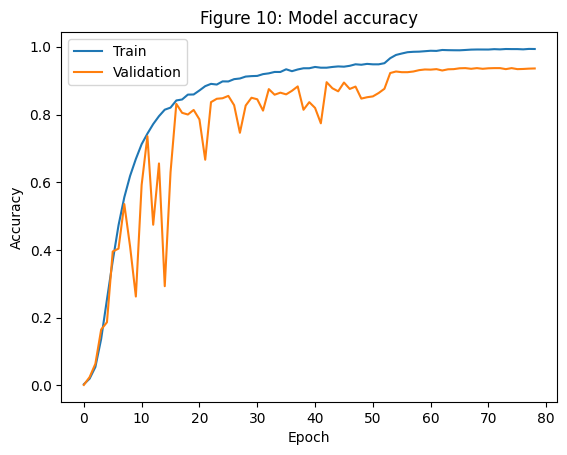

In [31]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Figure 10: Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

The model is training since with the next epochs the accuracy is getting higher and higher until it reacahes a stable accuracu between 80 and 90%. It is noticed that the are some fluctuating in the accuarcy between the 10th epoch until 33rd epoch. But it is interpreted as it doesn't affect the performace, It could be due the use of dropouts techniques with the use of batch normalization technique.

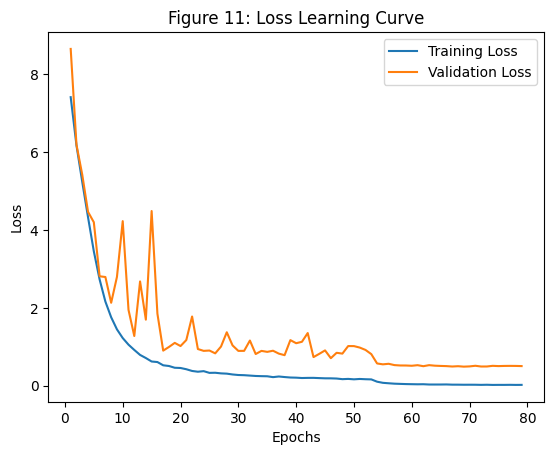

In [32]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Figure 11: Loss Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The loss learning curve shows that along the epochs the loss gets lower and lower until it's under 0.1, however it's noticed that in the first 30 epochs there are fluctuating in the validation loss, it's not smooth such as the training one. 

#### Testing and save model weights

In [33]:
model.save("IRISRecognizer.h5")
reconstructed_model = keras.models.load_model("IRISRecognizer.h5")
test_loss, test_acc = reconstructed_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9238 - loss: 0.6910
Test accuracy: 92.500


Predictions on sample images

In [34]:
def evaluate_model_visualize(dataset, y_true, model, class_names):
    """
    Make a sample and predict it using the model visualize outputs and calculate the accuracy.
    Args:
        - dataaset (np.array): x_test dataset
        - y_true (np.array): y_test dataset
        - model (keras.Sequential): weighted trained model
        - class_names (pd.Series): classes in the dataset
    Return:
        - Nothing.
    """
    num_rows = 4
    num_cols = 6
    data_batch = dataset[0:num_rows * num_cols]
    predictions = model.predict(data_batch)
    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx], cmap="gray")

        pred_idx = np.argmax(predictions[idx])
        true_idx = y_true[idx]

        title = f"{class_names[true_idx]} : {class_names[pred_idx]}"
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == true_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")
    acc = num_matches / (num_rows * num_cols)
    print("Prediction accuracy: {:.2%}".format(acc))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction accuracy: 95.83%


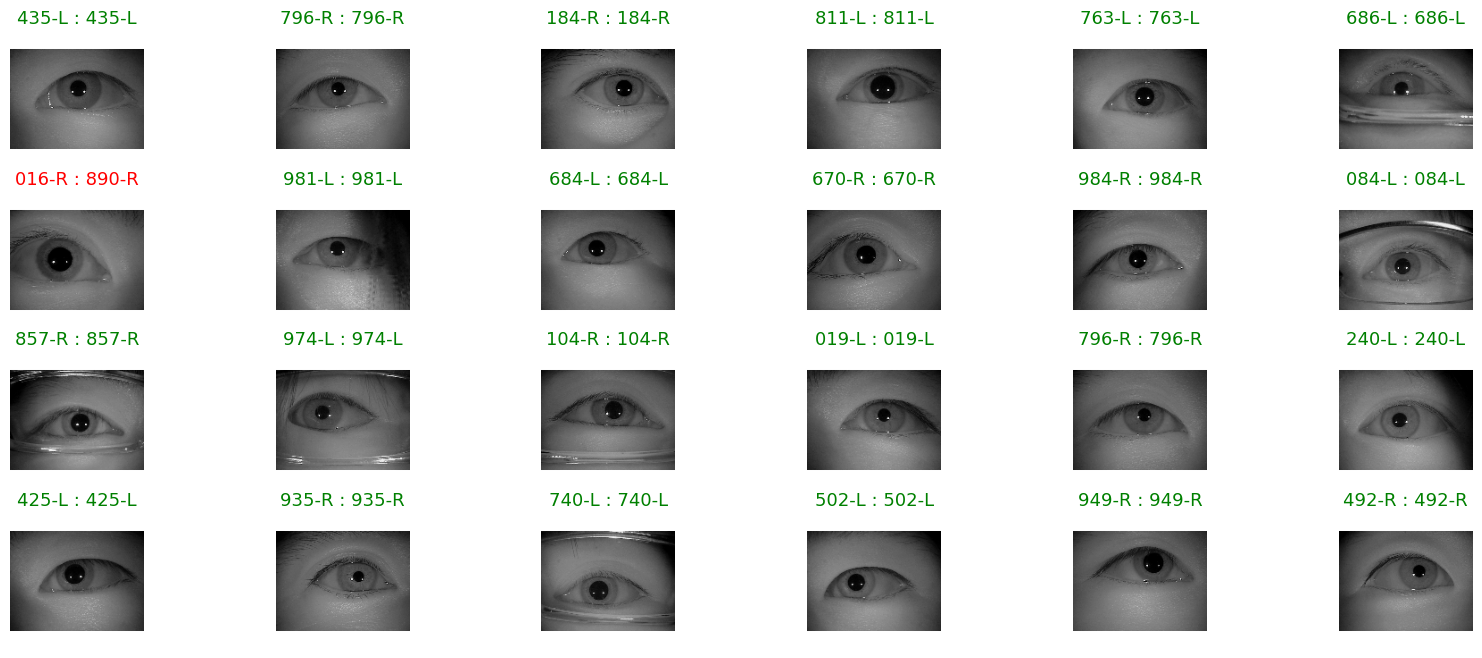

In [35]:
evaluate_model_visualize(x_test,y_test, reconstructed_model,df['Label'].unique())

From this prediction sample the accuracy of the model on classifiying the sample has reached 87.5%. We have two red sample that were wrongly classified, however it is noticed that the model is able to actually tell if the eye image is a left eye or a right eye wich is a good thing so far.

**Threshold decision:** the decision is based on the confidence level of the model on their classifications, the maximum value minus the minimum value will give a good threshold.

In [36]:
def describe_model_confedince(reconstructed_model, x_test): 
    """
    This is to look into the distribution of the maximum liklihoods
    represnts the confidence levels of the how much the model is sure this is (the classification)
    Args:
        - reconstructed_model(keras.Sequential): trained weights
        - x_test(np.array): testing images
    Returns:
        Nothing, only prints statics about the max_liklihoods
    """
    probabilites = reconstructed_model.predict(x_test)
    y_pred = np.argmax(probabilites, axis=1)
    max_liklihoods = np.max(probabilites, axis=1)
    print("Average of (Maximum Liklihood) for predictions: ", np.average(max_liklihoods))
    print("Standard deviation of (Maximum Liklihood) for predictions: ", np.std(max_liklihoods))
    print("Median of (Maximum Liklihood) for predictions: ", np.median(max_liklihoods))
    print("Minimum of (Maximum Liklihood) for predictions: ", np.min(max_liklihoods))
    print("Maximum of (Maximum Liklihood) for predictions: ", np.max(max_liklihoods))
    threshold = np.max(max_liklihoods) - np.min(max_liklihoods)
    print("Chosen threshold is: ", threshold)
    return probabilites

In [37]:
probabilites = describe_model_confedince(reconstructed_model, x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Average of (Maximum Liklihood) for predictions:  0.97524625
Standard deviation of (Maximum Liklihood) for predictions:  0.089786656
Median of (Maximum Liklihood) for predictions:  0.9999987
Minimum of (Maximum Liklihood) for predictions:  0.29602388
Maximum of (Maximum Liklihood) for predictions:  1.0
Chosen threshold is:  0.70397615


- The avergae maximum probabiliy is (0.9541976). The average is a high one that means that the model is more certain or confidence about the higher probaility of each class.
- The median is also very high value (0.9999617). 
- The maximum is (1)

#### Model Evaluaion metrics:
The evaluation is done using the required metrics:
- **False Match Rate (FMR):** The rate at which an imposter is incorrectly classified as a genuine user. 
- **False Non-Match Rate (FNMR):** The rate at which a genuine user is incorrectly classified as an imposter. 
- **Plot the Receiver Operating Characteristic (ROC) curve**, which shows the trade-off between FMR and FNMR. 
- **Determine the Equal Error Rate (EER)**, the point on the ROC curve where FMR and FNMR are equal. 

In [38]:
precision = Precision(task="multiclass", num_classes=2000)
recall = Recall(task="multiclass", num_classes=2000)
accuracy = Accuracy(task="multiclass", num_classes=2000)
maurc = AUROC(task="multiclass",num_classes=2000)

In [39]:
accuracyv = accuracy(torch.tensor(probabilites), torch.tensor(y_test))
prec = precision(torch.tensor(probabilites), torch.tensor(y_test))
rec = recall(torch.tensor(probabilites), torch.tensor(y_test))
aurc = maurc(torch.tensor(probabilites), torch.tensor(y_test))

/opt/conda/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


In [40]:
print(f"Accuracy: {accuracyv}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")

Accuracy: 0.925000011920929
Precision: 0.925000011920929
Recall: 0.925000011920929


In [41]:
fpr = dict()
tpr = dict()
roc_auc = dict()

num_classes = 2000

for i in range(num_classes):
    y_true_binary = np.where(y_test == i, 1, 0)
    fpr[i], tpr[i], _ = roc_curve(y_true_binary, probabilites[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

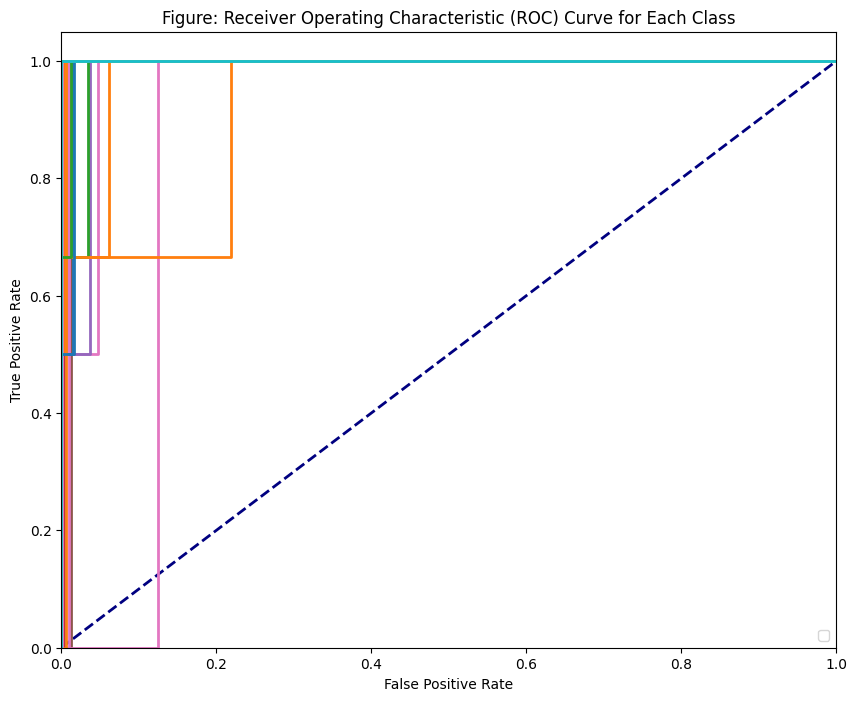

In [42]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  ## this is the state of a random classifier

for i in range(num_classes):
    if not math.isnan(roc_auc[i]):
        plt.plot(fpr[i], tpr[i], lw=2)#, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure: Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

In [43]:
eer_thresholds = []

for i in range(num_classes):
    try:
        fpr_values = fpr[i]
        tpr_values = tpr[i]
        interp_fn = interp1d(fpr_values, tpr_values)
        def eer_fn(x):
            return 1.0 - x - interp_fn(x)

        eer_threshold = brentq(eer_fn, 0.0, 1.0)
        eer_thresholds.append(eer_threshold)
    except ValueError:
        continue

avg_eer_threshold = np.mean(eer_thresholds)
print(f"Equal Error Rate (EER) Threshold: {avg_eer_threshold:.4f}")

Equal Error Rate (EER) Threshold: 0.0006


#### Model Exporting 
The environemnt which the model will be used to do infernece on is a mobile application environmnet. The form that the model is chosen to be exported into is tflite.

In [44]:
# tf.saved_model.save(reconstructed_model, './model')
# coverter = tf.lite.TFLiteConverter.from_saved_model('./model')
# tflite_model = coverter.convert()
# tflite_model_file = pathlib.Path('./model/model.tflite')
# tflite_model_file.write_bytes(tflite_model)

In [45]:
# interpreter = tf.lite.Interpreter(model_content=tflite_model)
# interpreter.allocate_tensors()
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()
# input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

# interpreter.set_tensor(input_details[0]['index'], input_data)
# interpreter.invoke()
# tflite_results = interpreter.get_tensor(output_details[0]['index'])

<hr>

### **User Experinece and GUI (The Authenticater)**
For the enrollemnt module, a mobile application is chosen for it's conveniency to take picture of the IRIS or upload the image itslef. The model is exported to be in a mobile application environmnet. 

#### First time users, and Prefrences
This is the activities that shows when the user opens the app wether they are first time users or not. They will either enroll or authenticate if the phone is not a first time user.

<div align="center">
<img src="https://github.com/sondosaabed/Deep-Learning-for-Text/assets/65151701/024181f1-7a0f-40f7-ba5d-b63ba90757a4" width="220"><img src="https://github.com/sondosaabed/Deep-Learning-for-Text/assets/65151701/b45dce95-257a-42e7-a885-7fdf85de2405" width="220">
</div>

Figure 12: Prefrences

#### Image Accuisition
The system does image aquisition in two forms, once for enrollemnt and the other is for authintication. As shown bellow there is two options, you either authnticate or enroll. To authnticate you can only use the Camera, to enroll the user can only use the gallery since there will have to chose images for the left eyes and images for the right eye.

<div align="center">
    <img src="https://github.com/sondosaabed/Deep-Learning-for-Text/assets/65151701/f2b46d84-4eb5-44e8-9caa-a1cdb63dcf30" width="220">
    <img src="https://github.com/sondosaabed/Deep-Learning-for-Text/assets/65151701/55fa7079-5f32-461a-b8b4-707dc0244b5d" width="220">
</div>

Figure 13: Image acusition

#### Image Preparing for Recognition

The image must be prepared in the same way as the image was prepared for training. So once the users input their Iris image it will go through image processing. Such as resizing and normalization.

#### Model Inference
Finally, after the image is aquired for recognition, the model infernce is done to it. The output will be the probalities or (confidences rates). The highest probablbe value will be then compared to the threshold that we obtained from the model confedince level, if teh highest one is less than the threshold then it will be not accepted and the user is redirected to anotehr screen, othersiwe they will be accepted with the label of them shown and the condince level is shown. 

For the enrollment, model inference will not be done, instead the model will be doing countinous training and the enrollment images are then added to the dataset and the model will retrain on them. So that it will be able to Identify the new (label).

Once the infernce answer is there, the user will see one of these outputs depending if the model infernce passed the threshold:

<div align="center">
    <img src="https://github.com/sondosaabed/Deep-Learning-for-Text/assets/65151701/7c7bf3f0-d8e0-4369-b207-a094c3c1f690" width="220">
    <img src="https://github.com/sondosaabed/Deep-Learning-for-Text/assets/65151701/1a360593-1ced-48a0-b5bb-24d59aa3fc1b" width="220">
</div>

Figure 14: Model Answer

## **Discussion and Optimization**

As in any software product, there is alwyas a room for optimization. Despite obtaining great accuracy results (90% on testing dataset), and having an average of confidence levels high as 95.41976% 
such authentication system are critical and in my opinion it must reach the state of the art such as 99% of accuracy in testing and generalizing in new dataset. 

Since this is a data driven project, of course having a diffrent dataset of people. Such as middle eastern ethnicties, african americans. The model could have bias, this would lead to bias authentications if new enrolled people have dark skin. Samples were defintly white asian people. This is because it's an end-to-end approach it doesn't inlude segmentation so the area around the Iris (the whole eye and a little face is shown).

<hr>

## **Conclusion**
In conclusion, a biometric authentication system was designed in this project. First of all, the dataset was chosen and goes through data analysis process were it was looked into in terms of distribution of images and labels, duplicates and missing of corrupted images. Then it was prepared using bare minimum image processing such as resizing with keeping the aspect ratio and normalization. The labels were transformed into codes. The model architicture is designed using Deep Convultional neural network, fully connected layers and softmaxs. Finally the model was trained, evaluated and exported. A simple mobile application was designed and the model was deployed on it to do inference of the model. Meanwhile the enrollment part is left as an optimization to the system, teh idea is to use countinuous training.
<hr>

## 🔴 **Cite This Notebook** 🔴

If you find this notebook useful in your research or projects, please consider citing it. Proper citation helps me gain recognition for my work and allows others to follow and build upon it.

**Sondos, _An End-to-end segmentation-free approach Iris Biometric Authentication_, Open Source (GitHub & Kaggle), May 2024. Available at: [https://github.com/sondosaabed/Iris-of-eyes-recognition](https://github.com/sondosaabed/Iris-of-eyes-recognition) and [https://www.kaggle.com/code/sondosaabed/iris-eye-recognition-endtoend-93](https://www.kaggle.com/code/sondosaabed/iris-eye-recognition-endtoend-93)**
<hr>


## **Refrences**
- [1] [Deep Learning for Iris Recognition: A Review, Yin, Y., He, S., Zhang, R., Chang, H., Han, X., & Zhang, J. (2024)](https://arxiv.org/abs/2303.08514)
- [2] https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
- [3] https://hycasia.github.io/dataset/casia-irisv4/
- [4] https://statisticallyrelevant.com/confusion-matrix-and-roc-curves/
- [5] https://www.researchgate.net/publication/327288671_The_Impact_of_Preprocessing_on_Deep_Representations_for_Iris_Recognition_on_Unconstrained_Environments
- [6] https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
- [7] https://www.v7labs.com/blog/confusion-matrix-guide
- [8] https://builtin.com/machine-learning/siamese-network
- [9] https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification
- [10] https://lightning.ai/docs/torchmetrics/stable/classification/auroc.html
- [11] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
- [12] https://github.com/sondosaabed/Introduction-to-Tensorflow-lite/blob/main/notebooks/Intro%20Code%20Examples.ipynb